# # EEG Eye State Classification

**Name:** [Your Name]


## Introduction

This Python notebook serves as a resource for EEG (Electroencephalogram) Eye State Classification. It contains code, explanations, and examples related to the classification of eye states using EEG data.

**Note for Students**: Throughout this notebook, you will find blank spaces or incomplete code sections. These are intentionally left for you to complete as part of your projects or assignments. Feel free to explore, modify, and experiment with the code to deepen your understanding of EEG eye state classification. It's through hands-on experience and practice that you'll gain proficiency in this topic.


## Data Description

The dataset was obtained from one continuous EEG measurement using the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state (open or closed) was detected via a camera during the EEG measurement and later manually added to the file after analyzing the video frames. In this dataset, '1' indicates the eye-closed state, and '0' indicates the eye-open state.

All values in the dataset are arranged in chronological order, with the first measured value at the top of the data.

**Dataset Details:**
- EEG Device: Emotiv EEG Neuroheadset
- Measurement Duration: 117 seconds
- Eye State Labels:
  - '1' - Eye Closed
  - '0' - Eye Open

This dataset is a valuable resource for exploring EEG-based eye state classification and can be used for various machine learning and data analysis tasks.


You can download the EEG Eye State dataset from the following link:

[Download EEG Eye State Dataset](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State)


**Suggestion for Students using Google Colab:**

1. Download the EEG Eye State dataset from the following link: [Download EEG Eye State Dataset](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State).

2. After downloading, upload the dataset to your Google Drive. This will make it easy to access and use the dataset in Google Colab notebooks.

3. In your Google Colab notebook, you can mount your Google Drive using the following code to access the dataset:
   
  


# **About the Dataset Format (ARFF):**

The EEG Eye State dataset is provided in ARFF (Attribute-Relation File Format). ARFF is a text-based file format commonly used with the Weka machine learning software, but it's also supported by various other data analysis tools and libraries.

ARFF files have a structured format that includes information about attributes (features) and data instances. Here's a brief overview:

- **Attributes**: In the context of this dataset, attributes represent the EEG measurements and other relevant information. Each attribute has a name, a data type (numeric or nominal), and possibly a list of possible values.

- **Data Instances**: These are the actual data points in the dataset. Each data instance corresponds to a single observation or measurement, and it includes values for each attribute.

In the case of the EEG Eye State dataset, attributes might include EEG sensor readings, and the data instances represent specific time points during the EEG measurement, along with the corresponding eye state labels.

**Working with ARFF Files:**

To work with ARFF files in Python, you can use libraries like `scipy` or `arff` to read and process the data. Additionally, many machine learning tools and libraries support ARFF format directly.

In Google Colab, you can upload the ARFF file to your notebook environment and then use these libraries to load and manipulate the dataset for analysis and machine learning tasks.

Feel free to explore the ARFF format and use it for your projects and assignments in this TA class.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing Required Libraries:**

Before you begin working with the EEG Eye State dataset, make sure you have the required Python libraries installed. You can use the following commands to install them:

- To install `scipy`, which will be helpful for reading ARFF files:

```python
!pip install scipy


In [ ]:
# Install the other important libraries
###


# Write your code here
! pip install scipy



###

In [ ]:
# Import the required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt


# Load the data

In [6]:


# Load the ARFF file using below code:

path = '/content/drive/MyDrive/Ali/EEG Eye State.arff'   ## USE your own path
data, meta = arff.loadarff(path)

# Convert the data into a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Now you can work with the DataFrame 'df'


In [4]:
data_raw = arff.loadarff(path)


In [5]:
data_raw

(array([(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85, b'0'),
        (4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44, 4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1 , b'0'),
        (4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92, 4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23, b'0'),
        ...,
        (4277.44, 3990.77, 4246.67, 4113.85, 4333.33, 4615.38, 4072.82, 4623.59, 4193.33, 4212.82, 4160.51, 4257.95, 4591.79, 4339.49, b'1'),
        (4284.62, 3991.79, 4251.28, 4122.05, 4334.36, 4616.41, 4080.51, 4628.72, 4200.  , 4220.  , 4165.64, 4267.18, 4596.41, 4350.77, b'1'),
        (4287.69, 3997.44, 4260.  , 4121.03, 4333.33, 4616.41, 4088.72, 4638.46, 4212.31, 4226.67, 4167.69, 4274.36, 4597.95, 4350.77, b'1')],
       dtype=[('AF3', '<f8'), ('F7', '<f8'), ('F3', '<f8'), ('FC5', '<f8'), ('T7', '<f8'), ('P7', '<f8'), ('O1', '<f8'), ('O2', '<f8')

In [7]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,b'1'
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,b'1'
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,b'1'
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,b'1'


# Plot AF3 channel

In [ ]:
## write your code here











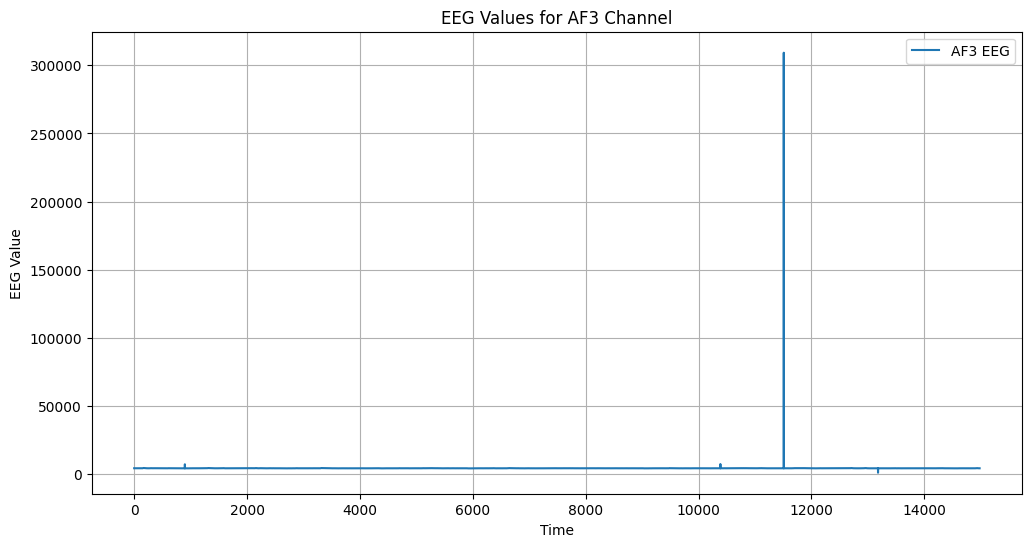

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['AF3'], label='AF3 EEG')
plt.title('EEG Values for AF3 Channel')
plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.legend()
plt.grid(True)
plt.show()


# OOPS!!
**Interpreting the Plot**

In the above plot, we are visualizing EEG (Electroencephalogram) values for AF3 channel.
- **EEG Values**: The y-axis represents the EEG values, which are electrical measurements recorded from the scalp.

- **Time**: The x-axis represents time, indicating how EEG values change over time.



**Is This an EEG Plot?**

Yes, this is an EEG plot. You need to solve the issue in order to obtain the EEG signal.



# Plot the other channels

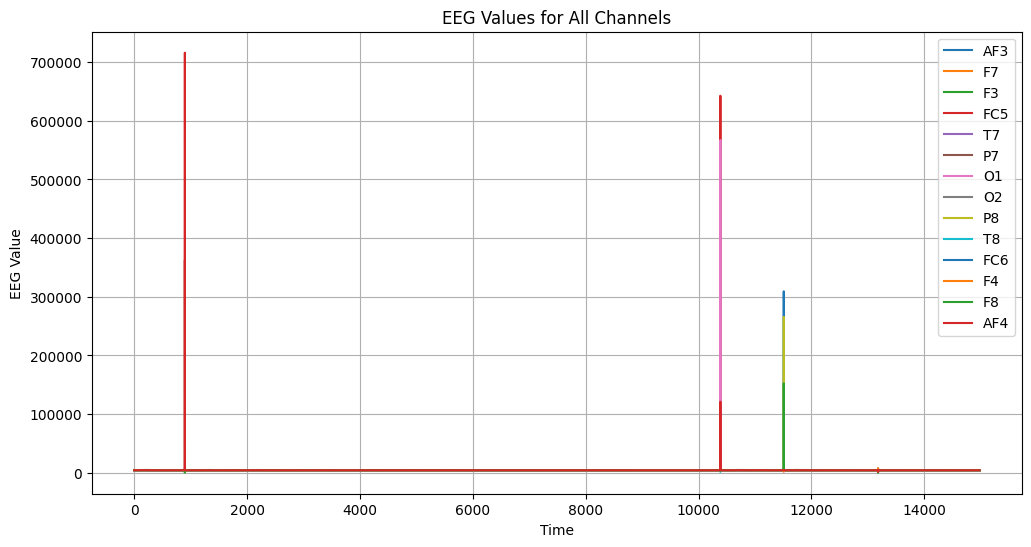

In [9]:
# Plot the EEG values for all channels without thresholding
plt.figure(figsize=(12, 6))
for channel in df.columns[:-1]:  # Exclude the last column ('eyeDetection')
    plt.plot(df[channel], label=channel)
plt.title('EEG Values for All Channels')
plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.legend()
plt.grid(True)
plt.show()


# Write your code to solve the above problem and obtain the below plot

In [ ]:
###
# Hint: plot the scatterplots for all the channels(Outliers :) )

###

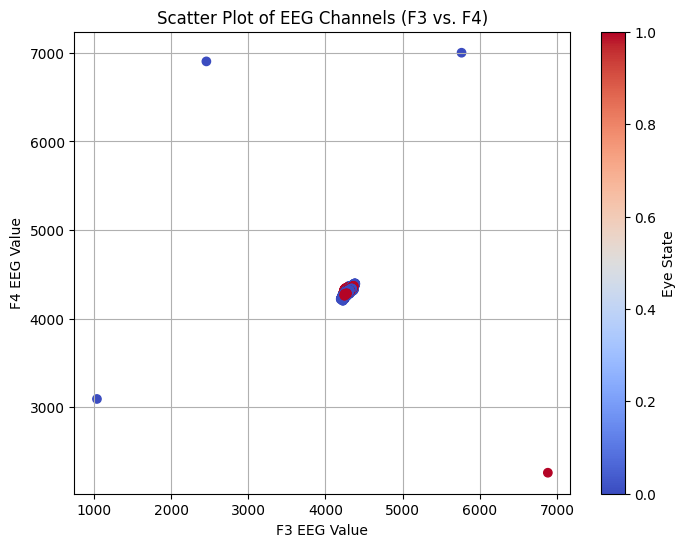

In [10]:
### HINT ###
plt.figure(figsize=(8, 6))
plt.scatter(df['F3'], df['F4'], c=df['eyeDetection'], cmap='coolwarm')
plt.title('Scatter Plot of EEG Channels (F3 vs. F4)')
plt.xlabel('F3 EEG Value')
plt.ylabel('F4 EEG Value')
plt.colorbar(label='Eye State')
plt.grid(True)
plt.show()


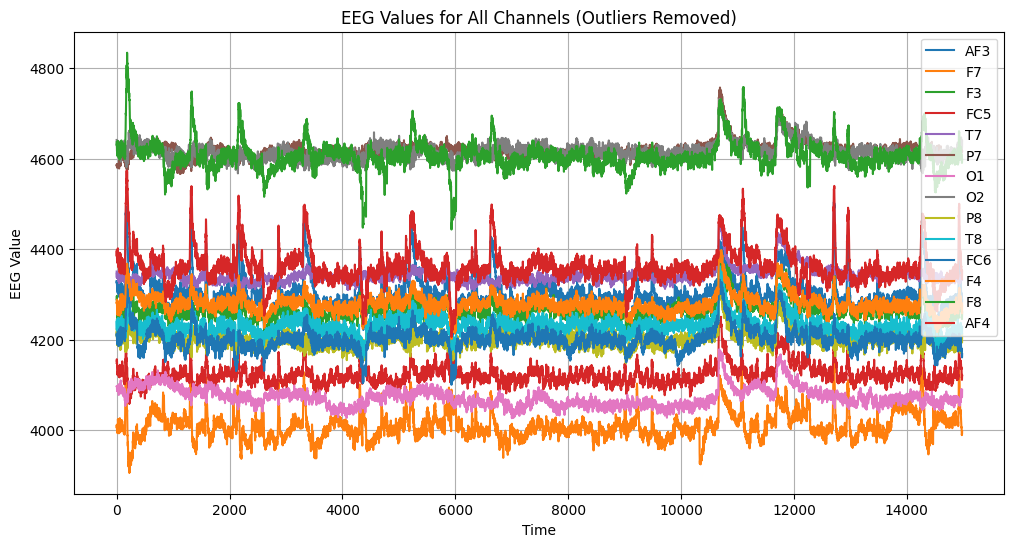

In [11]:
from scipy import stats

# Create a copy of the DataFrame to avoid modifying the original data
filtered_df = df.copy()

# Define the threshold for outlier removal (e.g., 35 standard deviations from the mean)
threshold = 35

# Iterate through all columns (channels) except the 'eyeDetection' column
for channel in df.columns[:-1]:  # Exclude the last column ('eyeDetection')
    # Calculate the z-scores for each data point in the current channel
    z_scores = np.abs(stats.zscore(filtered_df[channel]))

    # Identify data points where the z-score exceeds the threshold
    outlier_indices = np.where(z_scores > threshold)

    # Remove rows containing outliers for the current channel
    filtered_df = filtered_df.drop(filtered_df.index[outlier_indices])

# Plot the EEG values for all channels after removing outliers
plt.figure(figsize=(12, 6))
for channel in df.columns[:-1]:  # Exclude the last column ('eyeDetection')
    plt.plot(filtered_df[channel], label=channel)
plt.title('EEG Values for All Channels (Outliers Removed)')
plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.legend()
plt.grid(True)
plt.show()


# How many Eye states do we have?

In [ ]:
# Write your code


#

# out should be below

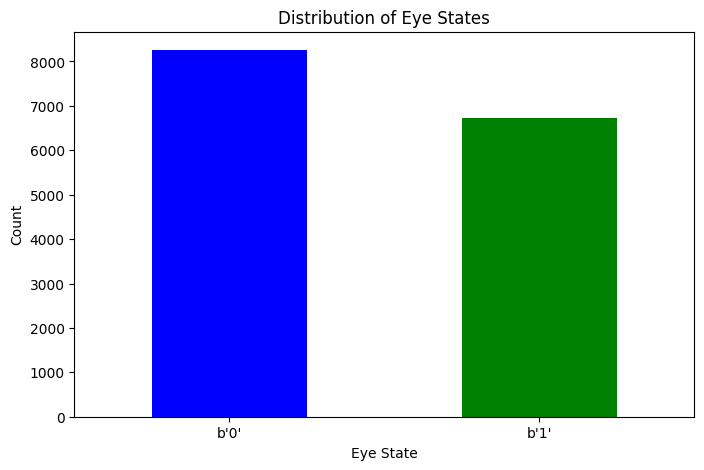

In [12]:
# you can see the bar plot of the states
plt.figure(figsize=(8, 5))
df['eyeDetection'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Eye States')
plt.xlabel('Eye State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Correct the eyeDetection column, you do not need to change the code, just Run the below codes.

## only explain in 3 lines why it is better to change the eyeDetection column

### your explaination

In [ ]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,b'1'
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,b'1'
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,b'1'
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,b'1'


In [13]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'eyeDetection' column to integers
df['eyeDetection'] = df['eyeDetection'].apply(int)

# Now the 'eyeDetection' column contains integers (0 and 1)


In [14]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


# Check for null values in the data

In [ ]:
# Check for null values in the DataFrame and sum them up for each column
# your code





#
# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)

In [15]:

df.isnull().values.any()


False

# Split the data into train and test (80-20)
# print the shape of them

In [16]:
data = df

In [17]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data.drop(columns=['eyeDetection'])  # Features (all columns except 'eyeDetection')
y = data['eyeDetection']  # Target (labels)

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (11984, 14)
X_val shape: (2996, 14)
y_train shape: (11984,)
y_val shape: (2996,)


# import the KNN , Random forest , Log reg, SVM

In [ ]:
# import the needed libraries
### your code in here :






#####

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# SVM

In [ ]:
# your code for Support Vector Machines (SVM)


In [19]:

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_predictions)

In [20]:
svm_accuracy

0.5293724966622163

In [ ]:
# complete the codes below:
print("SVM Accuracy for train set :", ' write your code here************') #########
print("SVM Accuracy for validation set :", ' write your code here**********' ) #######


SVM Accuracy for train set :  write your code here************
SVM Accuracy for validation set :  write your code here**********


#  Logistic Regression


In [21]:

logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_val)
logreg_accuracy = accuracy_score(y_val, logreg_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.6268357810413885


# Random Forest


In [23]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9202269692923899


# KNN

In [24]:





# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can specify the number of neighbors
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_predictions)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9689586114819759


# the above results are not promising. explain why?

In [ ]:
###  Write a complete answer









###

# Is it okay if we just see the Accuracy for evaluating our models? explain why? for this specific data.

In [ ]:
####
# explain


###

# How we can imporve the results

In [ ]:
###

#your explaination

###

# Do your codes and explainations in order to obtain valid results and report the accuaracy and other important metrics.



# Bonus

# It would be great if you do the grid_search and report the results